In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.computation.check import NUMEXPR_INSTALLED

# Data Cleaning

### Input the customer segmentation data

In [4]:
df=pd.read_csv(r"C:\Users\parig\OneDrive\Desktop\NITW\interns 25\c project\customer_segmentation.csv")

In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [6]:
df.shape

(35116, 8)

In [7]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,35116.000000,35116.000000,35116.000000,33698.000000
mean,559940.650273,14.624302,4.700512,12793.819188
std,12645.318619,31.144229,51.807988,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548737.000000,5.000000,1.250000,12473.000000
50%,561037.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


### To check for presence of any missing values

In [9]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

1418 enteries do not have a unique customer ID so, I will be dropping these transactions. 

In [10]:
df=df[df.CustomerID.notnull()]

In [11]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

The dataframe does not have any missing values now

### To check for any duplicate values

In [12]:
df.duplicated().sum()

64

Since there are 64 duplicate values, these will also be dropped

In [15]:
df=df.drop_duplicates(keep='last')

In [16]:
df.duplicated().sum()

0

In [19]:
df.shape

(33634, 8)

### converting customer ID to integers

In [20]:
df['CustomerID'] = df.CustomerID.astype(int)

In [21]:
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int32

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France
...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France


### Creating a new coloumn Sales
sales can be derived from the 2 existing coloumns Quantity and UnitPrice

**Sales = Quantity \* UnitPrice**

In [23]:
df['Sales'] = df.Quantity * df.UnitPrice

In [25]:
df.Sales.head(10)

0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
5    40.8
6    30.0
7    53.1
8    70.8
9    46.8
Name: Sales, dtype: float64

In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.20
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.60
...,...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France,10.20
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France,12.60
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France,16.60
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France,16.60


### To save the cleaned data

In [28]:
df.to_csv('cleaned_transactions.csv', index=None)

# Feature Engineering

<Axes: xlabel='count', ylabel='Country'>

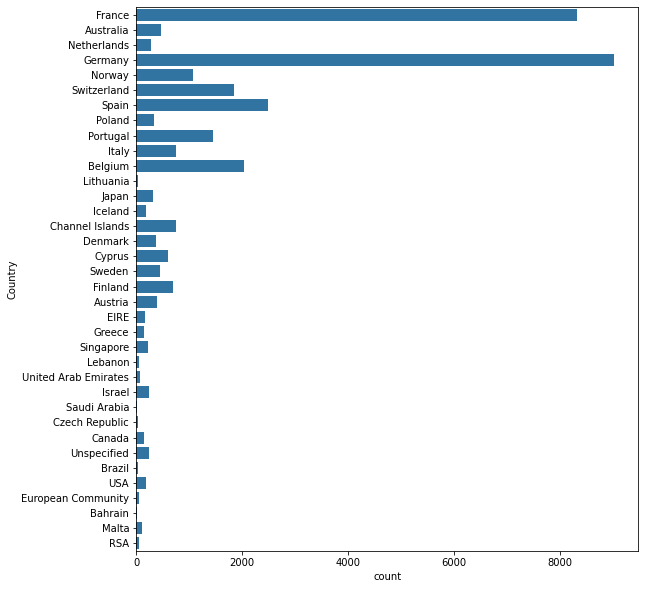

In [29]:
plt.figure(figsize=(9,10))

sns.countplot(y='Country', data=df)

From this we can conclude
- maximum transactions are from France and Germany
- certain countries like Saudi Arabia, Behrain, Brazil,etc. have very few transaction so it would not be practical to segment customers based on only geographic location.

### The total number of unique transactions for each customer## 

In [31]:
invoice_data = df.groupby('CustomerID').agg(total_transactions=('InvoiceNo', 'nunique'))

In [32]:
invoice_data.head(10)

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
12353,1
12354,1
12355,1
12356,3


### Total products and unique products brought by each customer

In [36]:
product_data = df.groupby('CustomerID').agg(
    total_products=('StockCode', 'count'),
    total_unique_products=('StockCode', 'nunique')
)

In [37]:
product_data.head(10)

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59
12353,4,4
12354,58,58
12355,13,13
12356,59,53


This gives the total number of products brought by the customer on the same or different transaction.

### To find total sales and average product value for every customer

In [39]:
sales_data = df.groupby('CustomerID').agg(
    total_sales=('Sales' , 'sum'),
    avg_product_value=('Sales' , 'mean' )
)

In [40]:
sales_data.head(10)

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824
12353,89.00,22.250000
12354,1079.40,18.610345
12355,459.40,35.338462
12356,2811.43,47.651356


### To find average invoice value for each customer

In [41]:
cart_data = df.groupby(['CustomerID' , 'InvoiceNo']).agg(cart_value=('Sales' , 'sum' ))

In [42]:
cart_data.head(10)

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
           573511        1294.32
           581180         224.82
12348      539318         892.80
           541998         227.44
           548955         367.00

- Grouping CustomerID and InvoiceNo treating each invoice as a cart.
- 'cart_value' is caluculated by taking the sum of the Sales column (total sales by invoice).

In [43]:
cart_data.reset_index(inplace=True)
cart_data.head(10)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


Now caluculating the average, minimum and maximum cart values

In [44]:
agg_cart_data = cart_data.groupby('CustomerID').agg(
    avg_cart_value=('cart_value', 'mean'), 
    min_cart_value=('cart_value', 'min'),
    max_cart_value=('cart_value', 'max')
)
                                                                 

In [45]:
agg_cart_data.head(10)

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30
12353,89.000000,89.00,89.00
12354,1079.400000,1079.40,1079.40
12355,459.400000,459.40,459.40
12356,937.143333,58.35,2271.62


### Joining the above dataframes and saving

In [47]:
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

customer_df.head(10)

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30
12353,1,4,4,89.00,22.250000,89.000000,89.00,89.00
12354,1,58,58,1079.40,18.610345,1079.400000,1079.40,1079.40
12355,1,13,13,459.40,35.338462,459.400000,459.40,459.40
12356,3,59,53,2811.43,47.651356,937.143333,58.35,2271.62


In [48]:
customer_df.to_csv('analysis_table.csv')

### To get the individual items purchased

so if two customers purchased similar items, the model should be more likely to group them into the same cluster.

creating a vector of unique values of the StockCode column and if the customer has purchased a particular product, it is filled by 1 else 0.

In [49]:
item_d= pd.get_dummies(df.StockCode)

item_d.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
item_d=item_d.replace({False:0,True:1})
item_d.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
item_d

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding new coloumn CustomerID so that we can get information on what are the products that are purchased by each customer.

In [52]:
item_d['CustomerID'] = df.CustomerID

item_d

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12680
35112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12680
35113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12680
35114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12680


In [53]:
item_data = item_d.groupby('CustomerID').sum()

item_data

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17508,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [54]:
item_data.sum()

10002       12
10120        1
10125       13
10133        5
10135        4
          ... 
90202D       1
90204        1
C2           6
M           34
POST      1055
Length: 2574, dtype: int64

- Since most of the values are in single digits it indicates that the customers are not buying a huge array of different items.
- 2574 customer-level features are created resulting in having high dimensionality. Thus, dimentionality is reduced by thresholding(set a threshold for keeping features). 

### Thresholding

Considering only the most popular items, I decided to select the top 150 items brought.

In [55]:
item_data.sum().sort_values().tail(150)

21981      44
22722      44
21987      44
22993      44
23296      44
         ... 
22556     179
22554     195
22423     222
22326     270
POST     1055
Length: 150, dtype: int64

 To get the list of the StockCodes for those 150 items.

In [56]:
top_150_items = item_data.sum().sort_values().tail(150).index

top_150_items

Index(['21981', '22722', '21987', '22993', '23296', '22704', '23289', '23202',
       '21124', '85123A',
       ...
       '21212', '22551', '22629', '22328', '21731', '22556', '22554', '22423',
       '22326', 'POST'],
      dtype='object', length=150)

In [57]:
top_item_data = item_data[top_150_items]
top_item_data

,21981,22722,21987,22993,23296,22704,23289,23202,21124,85123A,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,1
17508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17828,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


Thus, we can say that these 150 features would be the most important out of the 2574 features

In [58]:
top_item_data.to_csv('threshold_item_data.csv')

### PCA

Principle Component Analysis reduces the dimensionality of the dataset by creating a sequence of principal components where each one tries to capture the most variance after accounting for the ones before it.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
scaler=StandardScaler()
scaler.fit(item_data)
item_data_scaled=scaler.transform(item_data)

item_data_scaled

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       ...,
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.12065146],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072]])

In [62]:
pca=PCA()
pca.fit(item_data_scaled)

PCA()

In [63]:
pca_item_data=pca.transform(item_data_scaled)
pca_item_data

array([[ 5.84497937e+00,  4.82394648e+00, -5.79303262e-01, ...,
        -6.61212341e-04, -4.13254535e-05,  9.91914884e-15],
       [-4.22189100e+00,  1.20860769e+00, -1.91821199e+00, ...,
        -1.96102377e-04, -2.68886731e-04,  2.68882139e-15],
       [-1.24360556e+00,  2.39086835e+00, -9.03976861e-02, ...,
         2.50364512e-04, -2.03376857e-04,  1.05033170e-14],
       ...,
       [-5.21423121e+00,  3.65534180e+00,  2.52422954e+00, ...,
         2.96300843e-04, -2.08842850e-06,  1.44328993e-14],
       [-4.94557350e+00,  3.01793105e+00, -1.52270183e+00, ...,
         2.90401802e-04, -3.85407565e-05,  1.66533454e-15],
       [-6.04455127e+00, -3.07146114e-01, -6.92580173e-01, ...,
        -2.36103288e-02,  4.00179969e-04,  1.09617176e-14]])

To calculate and plot the cumulative explained variance. This explains how many PC features we'd need to keep in order to capture most of the original variance.

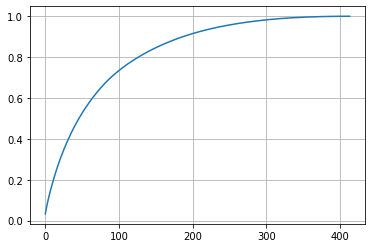

In [64]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)

plt.grid()
plt.plot(range(len(cum_variance)), cum_variance)

In [69]:
cum_variance[300]

0.982397956961059

So to capture around 98% of variance 300 components are required

In [70]:
pca = PCA(n_components=300)

In [71]:
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 300)

In [72]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
items_pca.index = item_data.index
items_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.844979,4.823946,-0.579303,3.091230,-7.858127,8.602103,2.329192,6.923118,5.446040,4.681131,...,-0.019724,-0.065779,0.119879,0.116685,-0.112167,0.068549,0.000078,-0.002501,-0.093479,-0.034919
12348,-4.221891,1.208608,-1.918212,-0.210253,1.231740,-0.456850,-0.941501,-0.885277,0.468918,0.779579,...,0.154417,-0.276822,0.076615,1.266801,-0.419206,-0.125669,0.288180,0.568098,-2.254436,-0.577392
12349,-1.243606,2.390868,-0.090398,-1.045630,-2.424983,2.823149,-0.270706,-0.175890,-0.740619,-0.362780,...,0.351627,-0.286137,0.553570,0.317627,-0.214904,0.234297,-0.785398,-0.157357,0.394854,0.262145
12350,-4.924320,-0.732324,-1.592762,-0.504651,0.186887,-0.723825,0.211004,-1.347741,1.399988,-1.219397,...,0.586135,0.006235,0.532377,0.297143,-0.731917,-0.502042,-1.959645,0.273028,0.203628,0.090328
12352,-2.062138,2.098675,0.163485,0.129939,-0.999329,1.662693,2.434436,0.913882,-0.666800,0.213291,...,-0.367087,0.076953,-0.097981,-0.113514,0.023971,0.126673,-0.031929,0.007048,-0.130635,-0.253641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,4.834726,-0.463858,-2.209835,-2.136658,-3.960075,5.174998,-1.322348,6.785599,-2.981309,-1.540597,...,-0.032497,0.052416,-0.060101,-0.213541,0.058679,-0.028325,0.034831,-0.204370,-0.029463,-0.054337
17508,-5.449871,0.981717,1.164035,-1.429534,2.565951,-1.145324,2.290023,-0.720376,1.247639,2.384401,...,0.019059,0.141840,-0.000179,0.075562,-0.003267,0.052177,0.042814,0.029818,-0.081949,-0.085939
17828,-5.214231,3.655342,2.524230,3.260766,-0.518037,-2.382101,3.489019,3.681177,1.767614,-5.111285,...,0.174764,0.094680,0.011347,0.040000,-0.058744,0.047773,0.037130,0.058309,-0.013196,0.011309


A dataframe of 300 customer-level principal component features is formed from the 300 principal components that explains the most variance for the original features.

In [73]:
items_pca.to_csv('pca_item_data.csv')

# K Means clustering

considering the following 3 dataframes

In [76]:
print(customer_df.shape)
print(top_item_data.shape)
print(items_pca.shape)

(414, 8)
(414, 150)
(414, 300)


**Purchase pattern features + item features chosen by thresholding (Threshold_df)**

In [77]:
threshold_df = customer_df.join(top_item_data)
threshold_df

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,21981,22722,...,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,...,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,1,0,...,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,1,...,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,...,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,...,0,0,0,0,1,0,0,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,3,135,132,2940.04,21.778074,980.013333,550.94,1217.64,0,0,...,0,1,0,0,0,1,1,1,0,1
17508,1,22,22,387.31,17.605000,387.310000,387.31,387.31,0,0,...,0,0,0,0,0,0,0,0,0,0
17828,4,67,54,1820.09,27.165522,455.022500,30.00,833.16,0,0,...,0,0,0,0,0,0,0,0,0,3


In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [81]:
t_scaler = StandardScaler()
threshold_df_scaled = t_scaler.fit_transform(threshold_df)

In [82]:
t_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

t_kmeans.fit(threshold_df_scaled)
threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled)

C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

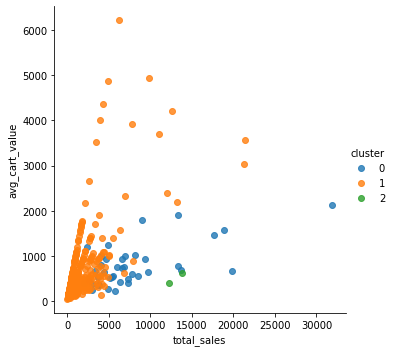

In [83]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

**Purchase pattern features + principal component features from items (PCA_df)**

In [85]:
pca_df = customer_df.join(items_pca)

pca_df

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.844979,4.823946,...,-0.019724,-0.065779,0.119879,0.116685,-0.112167,0.068549,0.000078,-0.002501,-0.093479,-0.034919
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.221891,1.208608,...,0.154417,-0.276822,0.076615,1.266801,-0.419206,-0.125669,0.288180,0.568098,-2.254436,-0.577392
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.243606,2.390868,...,0.351627,-0.286137,0.553570,0.317627,-0.214904,0.234297,-0.785398,-0.157357,0.394854,0.262145
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.924320,-0.732324,...,0.586135,0.006235,0.532377,0.297143,-0.731917,-0.502042,-1.959645,0.273028,0.203628,0.090328
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,-2.062138,2.098675,...,-0.367087,0.076953,-0.097981,-0.113514,0.023971,0.126673,-0.031929,0.007048,-0.130635,-0.253641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,3,135,132,2940.04,21.778074,980.013333,550.94,1217.64,4.834726,-0.463858,...,-0.032497,0.052416,-0.060101,-0.213541,0.058679,-0.028325,0.034831,-0.204370,-0.029463,-0.054337
17508,1,22,22,387.31,17.605000,387.310000,387.31,387.31,-5.449871,0.981717,...,0.019059,0.141840,-0.000179,0.075562,-0.003267,0.052177,0.042814,0.029818,-0.081949,-0.085939
17828,4,67,54,1820.09,27.165522,455.022500,30.00,833.16,-5.214231,3.655342,...,0.174764,0.094680,0.011347,0.040000,-0.058744,0.047773,0.037130,0.058309,-0.013196,0.011309


In [86]:
p_scaler = StandardScaler()
pca_df_scaled = p_scaler.fit_transform(pca_df)

In [87]:
p_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
p_kmeans.fit(pca_df_scaled)
pca_df['cluster'] = p_kmeans.fit_predict(pca_df_scaled)

C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

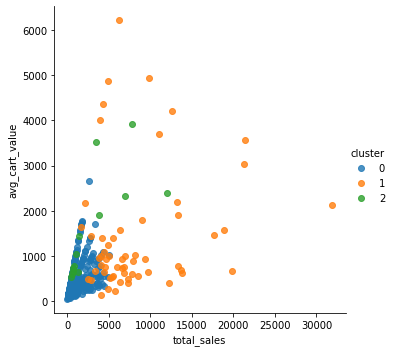

In [88]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

**Only purchase pattern features (customer_df)**

In [84]:
c_scaler = StandardScaler()
cus_df_scaled = c_scaler.fit_transform(customer_df)

In [89]:
c_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

c_kmeans.fit(cus_df_scaled)
customer_df['cluster'] = c_kmeans.fit_predict(cus_df_scaled)

C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\parig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

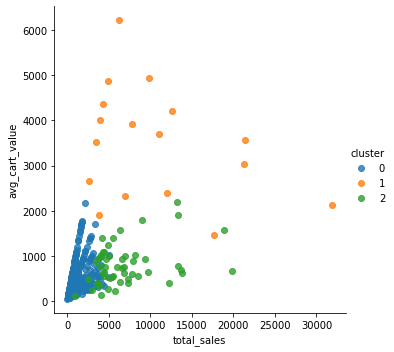

In [90]:
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=customer_df, fit_reg=False)

### To compare similarity between the three different clusters

In [91]:
adjusted_rand_score(pca_df.cluster, threshold_df.cluster)

0.4824010252080051

In [92]:
adjusted_rand_score(pca_df.cluster, customer_df.cluster)

0.7187980748401644

In [93]:
adjusted_rand_score(customer_df.cluster, threshold_df.cluster)

0.5214401883270624

The difference in the 3 segmentation clusters is due to the difference in analysis techniques used. It now depends on the buisness to decide as to what type of segmentation would work the best for them . 
- Purchase pattern features + item features chosen by thresholding 
- Purchase pattern features + principal component features from items 
- Only purchase pattern features 





The above analysis can also determine the similarities between different segmentation approaches. This is important for businesses because it helps in evaluating the effectiveness of different strategies and understanding the relationship between various customer segments.
For example, if a business wants to switch from one customer segmentation method to another method, analyzing the overlap or differences between the two segmentations can provide valuable insights.
- By comparing different segmentation techniques, businesses can see which customers consistently fall into similar groups.
- If two segmentation approaches yield similar clusters, businesses can apply the same or slightly modified marketing strategies to target these groups.
- It can help a business to gauge the potential impact of a strategy shift